In [5]:
import joblib
import miniautoml
import os
import stylia
import numpy as np
from stylia import NamedColors

results_folder = "/Users/mduranfrigola/Documents/GitHub/mini-automl/results"

def roc_plot(ax, model_name, color):
    x = np.arange(0,1.01,0.01)
    results = joblib.load(os.path.join(results_folder, "{0}.joblib".format(model_name))).validation_metrics
    n_splits = results["n_splits"]
    ys = []
    for i in range(n_splits):
        fpr = results["fprs"][i]
        tpr = results["tprs"][i]
        ys += [np.interp(x, fpr, tpr)]
    ys = np.array(ys)
    y_mean = np.array([0] + list(np.mean(ys, axis=0)))
    y_std = np.array([0] + list(np.std(ys, axis=0)))
    x = np.array([0] + list(x))
    ax.plot(x, y_mean, zorder=1000, color=color, lw=1)
    ax.fill_between(x, np.clip(y_mean+y_std, 0,1), np.clip(y_mean-y_std, 0,1), color=color, alpha=0.3, lw=0)
    ax.plot([0,1], [0,1], lw=0.5, color="lightgray")
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    n = results["positives"]
    roc_mean = np.mean(results["aucs"])
    roc_std = np.std(results["aucs"])
    return roc_mean

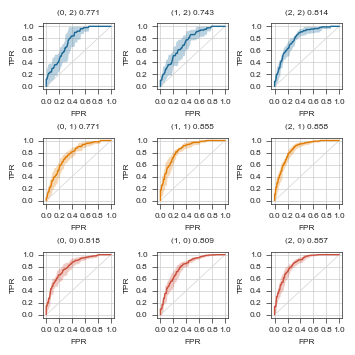

In [8]:
fig, axs = stylia.create_figure(3,3, 1.75*2, 1.75*2)

tasks = ["promiscuity_fxp0_pxf2",
         "promiscuity_fxp1_pxf2",
         "promiscuity_fxp2_pxf2",
         "promiscuity_fxp0_pxf1",
         "promiscuity_fxp1_pxf1",
         "promiscuity_fxp2_pxf1",
         "promiscuity_fxp0_pxf0",
         "promiscuity_fxp1_pxf0",
         "promiscuity_fxp2_pxf0"]

for t in tasks:
    ax = axs.next()
    if "pxf0" in t:
        color = NamedColors().red
    if "pxf1" in t:
        color = NamedColors().orange
    if "pxf2" in t:
        color = NamedColors().blue
    auroc = roc_plot(ax, t, color)
    
    i = t.split("fxp")[1][0]
    j = t.split("pxf")[1][0]
    stylia.label(ax, title="({0}, {1}) {2:.3f}".format(i, j, auroc), xlabel="FPR", ylabel="TPR")
stylia.save_figure("../assets/promiscuity-roc-plots.png")
stylia.save_figure("../assets/promiscuity-roc-plots.pdf")